# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** W

**Names:**

* Olivier Cloux
* Thibault Urien
* Saskia Reiss

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
# need to import a few things
import networkx as nx
import matplotlib.pyplot as plt

# helper function
def plot_degree_distribution(G):
    degs = list()
    for n in G.nodes():
        deg = G.degree(n)
        if deg >= len(degs):
            degs = degs + [0] * (deg - len(degs) + 1)
        degs[deg] += 1
    return degs

In [2]:
# Part 1 : read the given file into a list
graph1 = nx.read_edgelist('../data/network1.csv', delimiter=',', nodetype=int, encoding="utf-8")

In [3]:
# Part 2 : Compute the number of edges and nodes in the graph.
print("Number of nodes :")
print(len(graph1.nodes()))
print("Number of edges :")
print(len(graph1.edges()))

Number of nodes :
13033
Number of edges :
18584


#### Exercise 2.2:  Node degree distribution

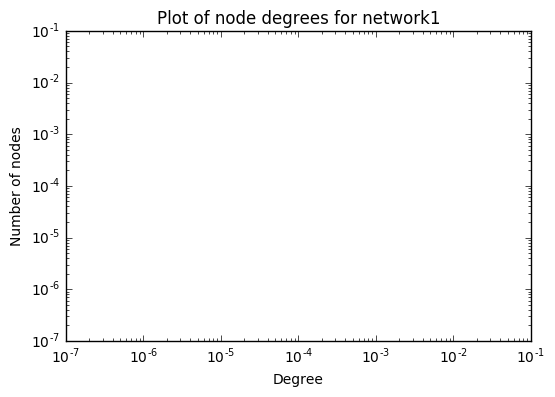

In [4]:
# compute the node degree distribution
degree_list = plot_degree_distribution(graph1)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Plot of node degrees for network1')
plt.show();

##### The Plot
The plot we choose to show the node degree distribution is a log-log plot, because there are a lot of nodes and thus makes a graph hard to read without a log scale (as it becomes exponential, and is stuck to the axes). We can also see that the ditribution ressembles greatly a Pareto distribution, with a very big shape parameter (here 8000) and a very little scale parameter (here 1).

#### Exercise 2.3: Giant component

In [5]:
nb_connected = nx.number_connected_components(graph1)
print("There are", nb_connected, "connected components, as returned by a method of the graph.");

giant = sorted(nx.connected_component_subgraphs(graph1), key=len)
print("The biggest component has ", len(giant[-1].nodes()),
      "nodes, when the second largest has",len(giant[-2].nodes()),"nodes. So there is a giant component")


There are 192 connected components, as returned by a method of the graph.
The biggest component has  12576 nodes, when the second largest has 16 nodes. So there is a giant component


#### Exercise 2.4: Short paths & Small-worlds

If we think about the fact that we have a giant component that is not connected to other components in any way, it is quite obvious that network1 is in fact not a small world, as there would be no way to get to another component from the giant component in six degrees.

Nevertheless, let us calculate...

#### Exercise 2.5: Network comparison

The network is composed of 26542 nodes and 43516 edges.


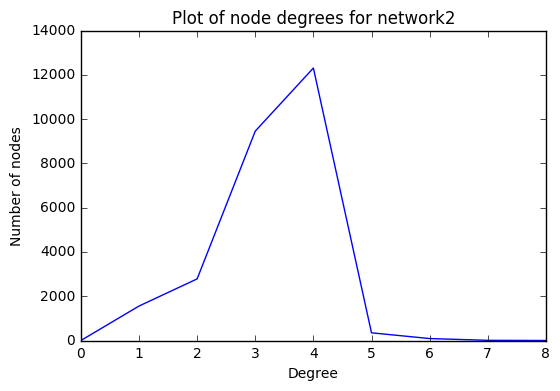

There are 5 connected components, as returned by a method of the graph.
The biggest component has  26481 nodes, when the second largest has 30 nodes. So there is a giant component


In [6]:
#Reading the graph
graph2 = nx.read_edgelist('../data/network2.csv', delimiter=',', nodetype=int, encoding="utf-8")

#Computing its size
print("The network is composed of", len(graph2.nodes()), "nodes and", len(graph2.edges()), "edges.")

#Computing degree distribution
degree_list2 = plot_degree_distribution(graph2)
plt.plot(degree_list2)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Plot of node degrees for network2')
plt.show();

#Computing the connected components
nb_connected2 = nx.number_connected_components(graph2)
print("There are", nb_connected2, "connected components, as returned by a method of the graph.");

giant2 = sorted(nx.connected_component_subgraphs(graph2), key=len)
print("The biggest component has ", len(giant2[-1].nodes()),
      "nodes, when the second largest has",len(giant2[-2].nodes()),"nodes. So there is a giant component")

#### Analysis of the network
We see here a normal distribution of nodes degree. The differences with the previous network is that most nodes have a bigger degree (most nodes of network1 had degree 1, whene in network2 it's 4). But some nodes in network1 went extreme with a degree of about 1500, when degrees here are all below 9.

Furthermore, the meager number of connected components and their size indicates one giant component, and only 4 small independent components. This is coherent with a real-world network, like roads for example.

#### Exercise 2.6: Network identification

We believe that the first network (*network1*) is the **subgraph of routers** comprising the Internet and that the second network (*network2*) is the **network of routes in New York**.

Because the nodes in one of the graphs are supposed to be intersections, it is clearly impossible to have a node of degree more than a thousand, simply because an intersection with a thousand roads going out of it is impossible due to physical limitations in the real world. Thus, it is quite evident that the graph that has a maximum node degree of 8 is a network of routes.

It is also not a problem that the network of routers is not a small world, seeing as it is only a **subgraph** and thus could mean that nodes not chosen in this graph connect each component with the giant component in some way. But seeing as these nodes are outside of the graph, the edges are not presented in *network1*.